<a href="https://colab.research.google.com/github/cnaresr/Visi-Komputer_TI2C/blob/main/JobSheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum

## Praktikum 1

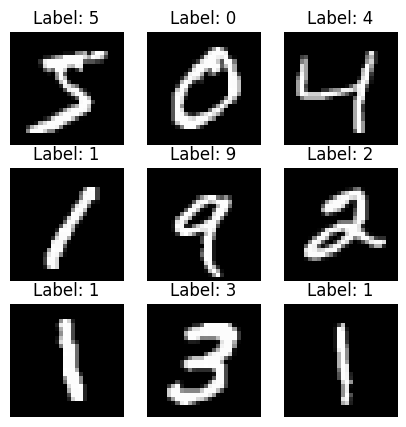

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

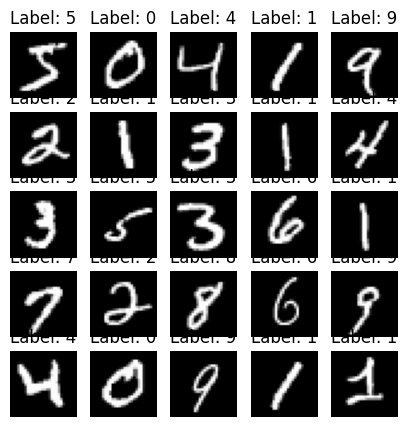

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')

plt.show()

## Praktikum 2

In [7]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# flatten
x_train_flat = x_train.reshape(len(x_train), -1) /255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


In [11]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# flatten
x_train_flat = x_train.reshape(len(x_train), -1) /255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


## Praktikum 3

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.8904 - loss: 0.3674 - val_accuracy: 0.9827 - val_loss: 0.0626
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.9817 - loss: 0.0625 - val_accuracy: 0.9857 - val_loss: 0.0516
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.9886 - loss: 0.0370 - val_accuracy: 0.9843 - val_loss: 0.0571
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.9920 - loss: 0.0271 - val_accuracy: 0.9877 - val_loss: 0.0501
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9943 - loss: 0.0183 - val_accuracy: 0.9877 - val_loss: 0.0499


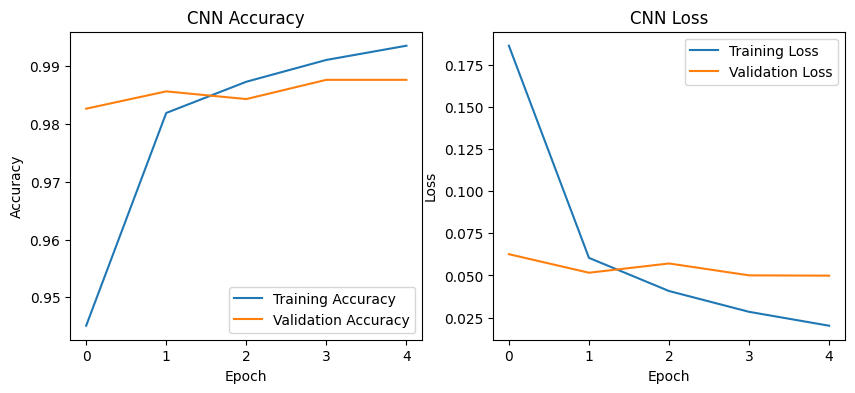

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) /255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ==== Plot History ====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 29ms/step - accuracy: 0.9000 - loss: 0.3187 - val_accuracy: 0.9800 - val_loss: 0.0670
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 60s 36ms/step - accuracy: 0.9853 - loss: 0.0470 - val_accuracy: 0.9902 - val_loss: 0.0348
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 67s 27ms/step - accuracy: 0.9901 - loss: 0.0283 - val_accuracy: 0.9898 - val_loss: 0.0375
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.9944 - loss: 0.0181 - val_accuracy: 0.9875 - val_loss: 0.0458
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.9955 - loss: 0.0140 - val_accuracy: 0.9900 - val_loss: 0.0400


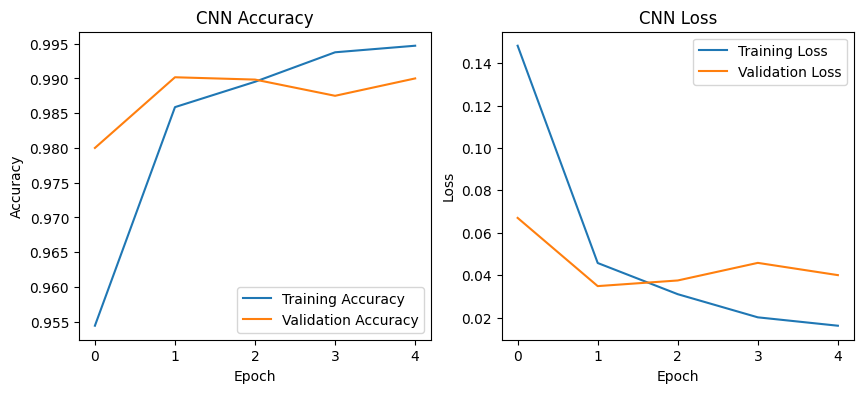

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) /255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ==== Plot History ====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Praktikum 4

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 74s 51ms/step - accuracy: 0.3581 - loss: 1.7498 - val_accuracy: 0.5634 - val_loss: 1.2436
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 75s 54ms/step - accuracy: 0.5816 - loss: 1.1916 - val_accuracy: 0.6302 - val_loss: 1.0713
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 86s 57ms/step - accuracy: 0.6387 - loss: 1.0313 - val_accuracy: 0.6484 - val_loss: 1.0129
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 59ms/step - accuracy: 0.6691 - loss: 0.9575 - val_accuracy: 0.6742 - val_loss: 0.9675
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 133s 53ms/step - accuracy: 0.6985 - loss: 0.8753 - val_accuracy: 0.6930 - val_loss: 0.9081
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 95s 62ms/step - accuracy: 0.7198 - loss: 0.8118 - val_accuracy: 0.6898 - val_loss: 0.9243
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 109s 39ms/step - accuracy: 0.7395 - loss: 0.7567 - val_accuracy: 0.7070 - val_loss: 0.8710
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.7633

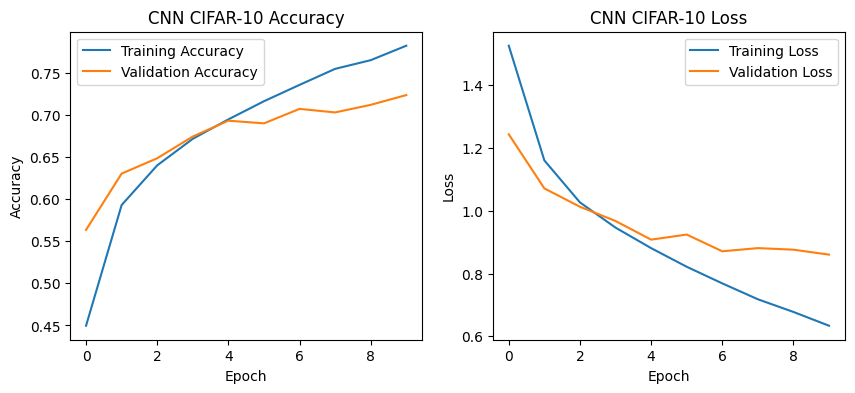

In [15]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0 , x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 38ms/step - accuracy: 0.2677 - loss: 1.9555 - val_accuracy: 0.5104 - val_loss: 1.3956
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 38ms/step - accuracy: 0.4399 - loss: 1.5376 - val_accuracy: 0.5732 - val_loss: 1.2109
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.4872 - loss: 1.3885 - val_accuracy: 0.5836 - val_loss: 1.1745
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.5235 - loss: 1.3133 - val_accuracy: 0.6212 - val_loss: 1.0797
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.5486 - loss: 1.2463 - val_accuracy: 0.6394 - val_loss: 1.0442
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 85s 40ms/step - accuracy: 0.5676 - loss: 1.2015 - val_accuracy: 0.6292 - val_loss: 1.0598
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 78s 37ms/step - accuracy: 0.5818 - loss: 1.1670 - val_accuracy: 0.6488 - val_loss: 1.0064
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.5960 -

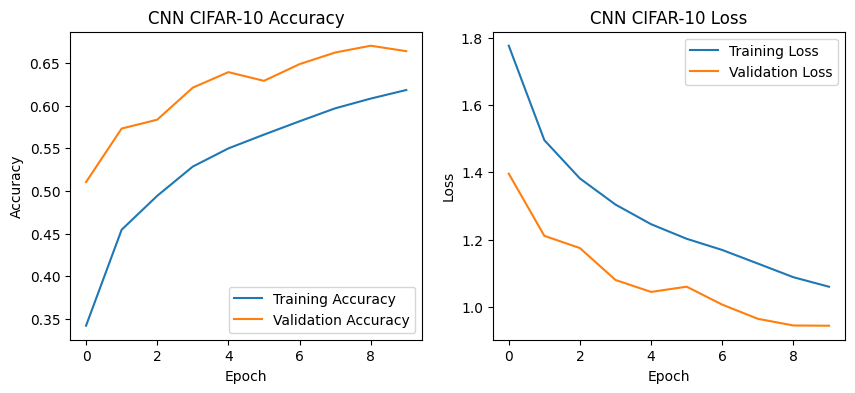

In [16]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0 , x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Praktikum 5

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 559s 396ms/step - accuracy: 0.4571 - loss: 1.5514 - val_accuracy: 0.5702 - val_loss: 1.2126
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 537s 378ms/step - accuracy: 0.5756 - loss: 1.2124 - val_accuracy: 0.5908 - val_loss: 1.1851
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 560s 377ms/step - accuracy: 0.6016 - loss: 1.1418 - val_accuracy: 0.5876 - val_loss: 1.1616
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 588s 396ms/step - accuracy: 0.6169 - loss: 1.0934 - val_accuracy: 0.5978 - val_loss: 1.1486
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 558s 393ms/step - accuracy: 0.6264 - loss: 1.0661 - val_accuracy: 0.6088 - val_loss: 1.1165


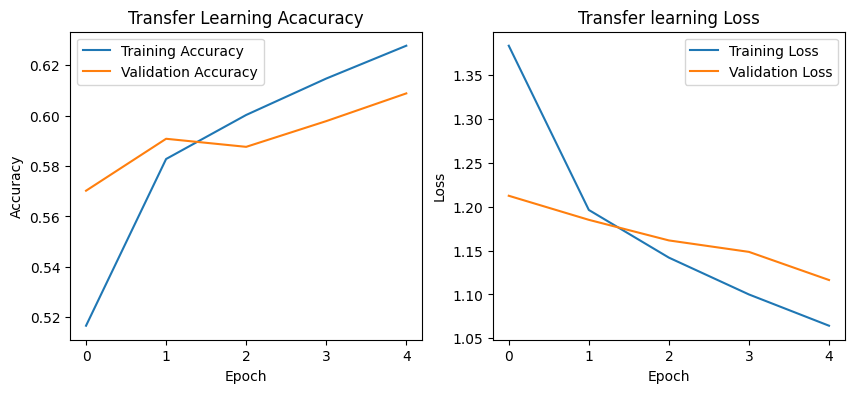

In [17]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ==== Plot History ====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Acacuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ==== Plot History ====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Acacuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Praktikum 6


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 105s 334ms/step


# Tugas